In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

from Scripts import simulation_CLI as cleo

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 

import matplotlib.animation as animation
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [86]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

In [87]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [88]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/landscape_maximizes")

In [89]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/mimic")

In [90]:
newdata1 = dict(h5py.File("../data/random/random.hdf5"))
newdata2 = dict(h5py.File("../data/greedy/greedy.hdf5"))
newdata3 = dict(h5py.File("../data/mimic/mimic.hdf5"))
newdata4 = dict(h5py.File("../data/landscape_maximizes/landscape_maximizes.hdf5"))

In [25]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

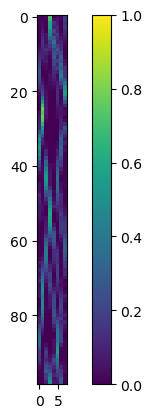

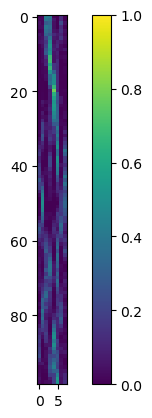

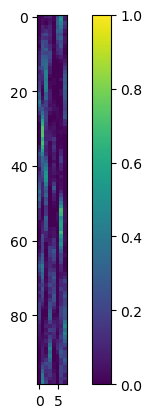

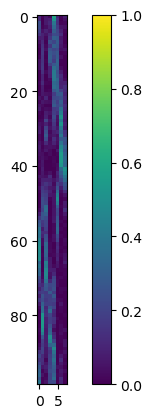

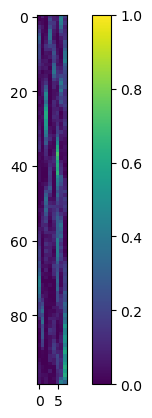

In [82]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0  # Replace with your desired minimum value
vmax = 1  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)


for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata1,size,conn,"random")
        for i in range(1):
            plt.imshow(pops[i][400:499], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

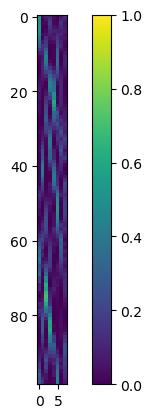

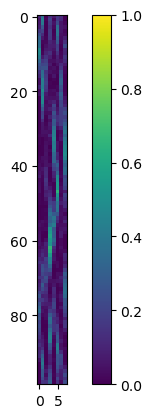

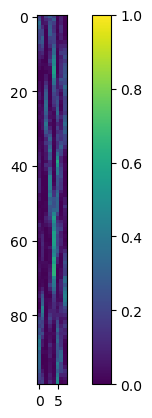

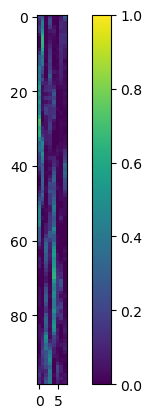

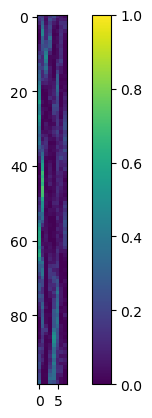

In [83]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0  # Replace with your desired minimum value
vmax = 1  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata2,size,conn,"greedy")
        for i in range(1):
            plt.imshow(pops[i][400:499], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

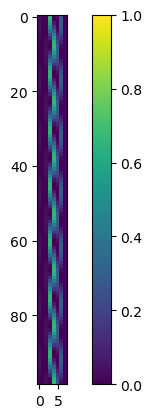

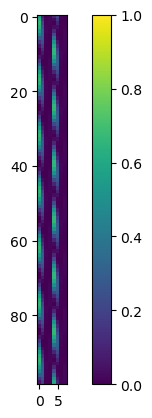

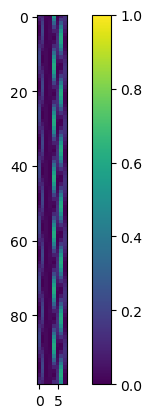

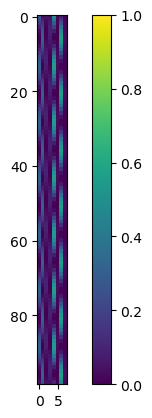

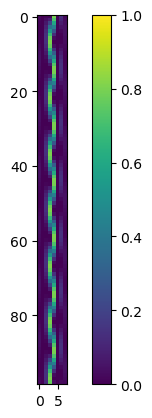

In [84]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0  # Replace with your desired minimum value
vmax = 1  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata4,size,conn,"landscape_maximizes")
        for i in range(1):
            plt.imshow(pops[i][400:499], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

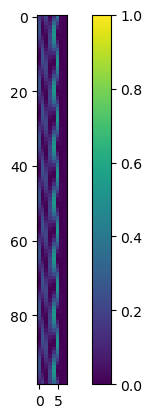

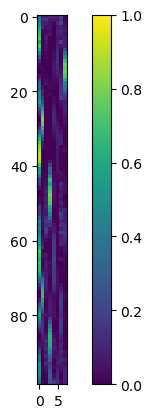

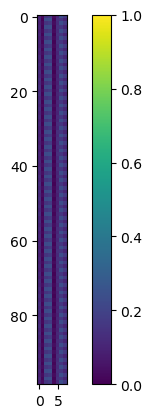

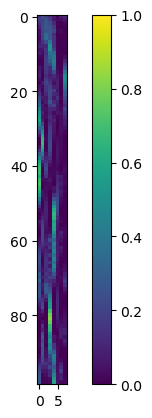

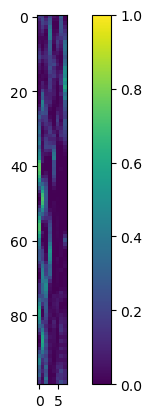

In [85]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0  # Replace with your desired minimum value
vmax = 1  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata3,size,conn,"mimic")
        for i in range(1):
            plt.imshow(pops[i][400:499], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

In [ ]:
Thermal state 7 cold at 0.2 and one hot at 0.4

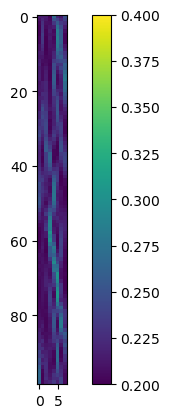

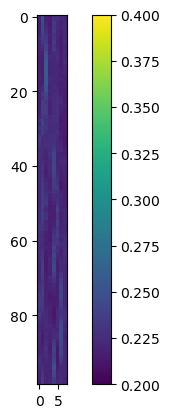

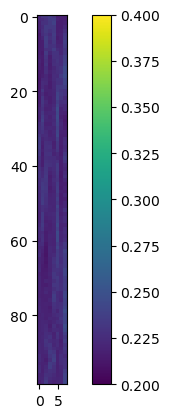

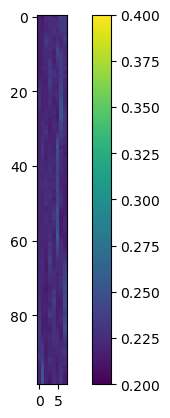

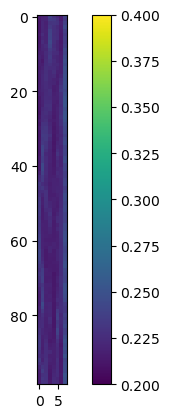

In [98]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.2  # Replace with your desired minimum value
vmax = 0.4 # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)


for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata1,size,conn,"random")
        for i in range(1):
            plt.imshow(pops[i][400:499], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

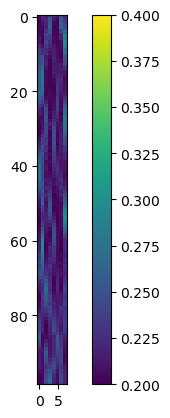

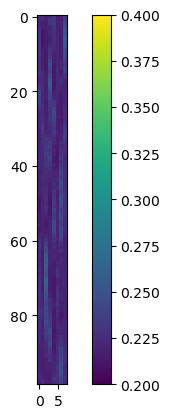

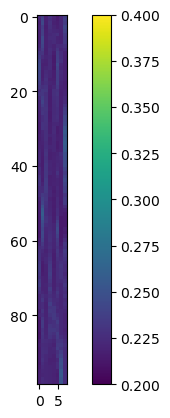

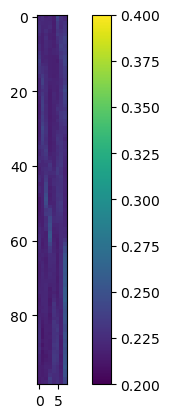

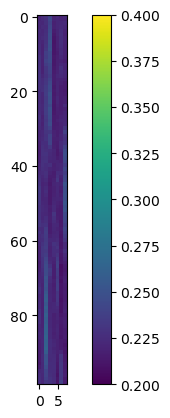

In [92]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.2  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)


for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata2,size,conn,"greedy")
        for i in range(1):
            plt.imshow(pops[i][400:499], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

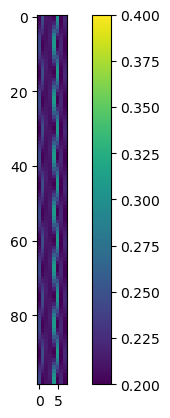

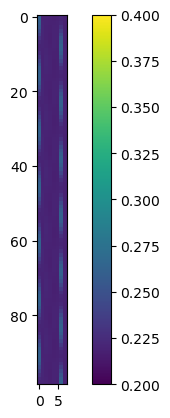

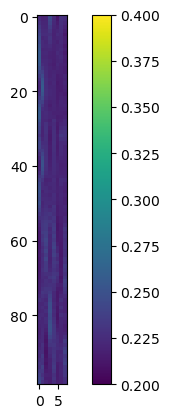

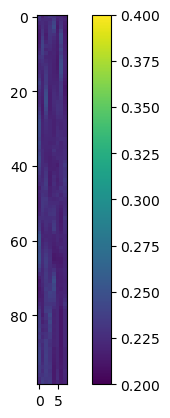

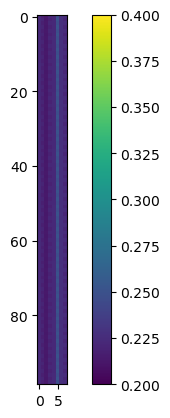

In [93]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.2  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)


for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata3,size,conn,"mimic")
        for i in range(1):
            plt.imshow(pops[i][400:499], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

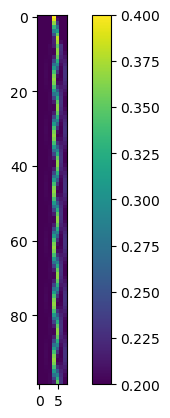

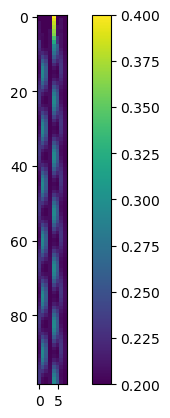

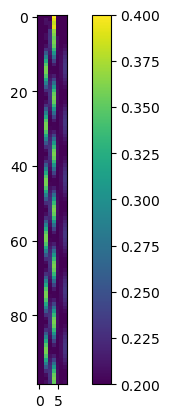

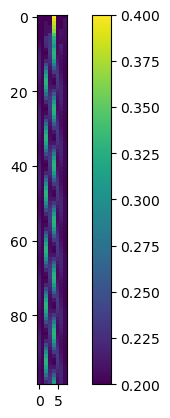

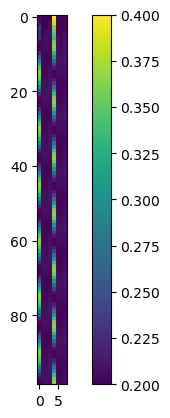

In [96]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.2  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)


for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata4,size,conn,"landscape_maximizes")
        for i in range(1):
            plt.imshow(pops[i][00:99], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

In [4]:
rules=["random","greedy","landscape_maximizes","mimic"]
conns = ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]
for conn in conns:
    for rule in rules:
        for unitary_seed in range(1):
            initial_pops = [.01,.01, .01, .45, .01, .01, .01, .01]
            system = DM.n_thermal_qbits(initial_pops)
            connectivity = conn
            unitary_energy_subspace = 1
            ordering_seed = 1
            chunk_size = 2
            order_rule_name = rule
            num_steps = 500
            data = cleo.execute(file_name=rule,
                               connectivity=connectivity,
                               order_rule_name = order_rule_name, 
                               unitary_seed=unitary_seed,
                               unitary_energy_subspace=unitary_energy_subspace,
                               evolution_generation_type="haar2Qunitary",
                               chunk_size=chunk_size,
                               num_steps=num_steps,
                               initial_pops=initial_pops,
                               verbosity = .9)

90%
[[0 1]
 [6 7]
 [4 5]
 [2 3]]


ValueError: not enough values to unpack (expected 3, got 2)